In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
from vahun.tools import Timer
from vahun.corpus import Corpus
from vahun.tools import explog
from vahun.variational_autoencoder import Variational_autoencoder
from vahun.tools import show_performance

encode=180
dictsize=2000000
popsize=1


config = tf.ConfigProto()
config.gpu_options.allow_growth = True
#config.gpu_options.per_process_gpu_memory_fraction=1
corp_path='/mnt/permanent/Language/Hungarian/Corp/Webkorpusz/webkorpusz.wpl'
corp=Corpus(corpus_path=corp_path,
            needed_corpus=["hun_lower_unique"],
            language="Hun",size=dictsize,encoding_len=10)
database=corp.hun_lower_unique
all_features=corp.featurize_data_charlevel_onehot(database)
train=all_features[0:int(len(all_features)*0.8)]
test=all_features[int(len(all_features)*0.8):len(all_features)]
x_train = train.reshape((len(train), np.prod(train.shape[1:])))
x_test = test.reshape((len(test), np.prod(test.shape[1:])))
print(x_train.shape)

logger=explog(encoder_type="variational_unique_"+str(encode),
              encoding_dim=encode,feature_len=10,
              lang="Hun",unique_words=len(set(database)),
              name="variational_unique_"+str(encode),population_size=popsize,
              words=len(corp.hun_lower_unique))

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

Reading file, speed:  2065913.3246184445  words/s
Reading file, speed:  1987079.70672564  words/s
Corpus initalized, fields: ['hun_lower_unique'] 
Unique words:  214708
(81526, 360)


In [2]:
encoder=Variational_autoencoder(logger=logger,tf_session=sess,
                         inputdim=360,
                         encoding_size=180,
                         optimizer =tf.train.AdamOptimizer(learning_rate = 0.001),
                         nonlinear=tf.sigmoid)
encoder.train(x_train,x_test,512,80)

    iszont 	     iszont
pavilonban 	 havilonban
    ezúton 	     ezuton
ácsorogtam 	  csorogtam
 tanítóval 	  tanytóval
      ezer 	       ezer
  homíliát 	   homíliát
 vonalakat 	  ponalakat
 akadályát 	  akadályát
  ezügyben 	   ezmgyben
átvitelére 	 btvitelére
  készítőt 	   készítőt
behatásnak 	 behatásnak
  elszerez 	   elszerez
 ismerősök 	  ismerösök
geographic 	 beographiz
  istvánig 	   istvánig
   nyerslé 	    nyersle
   maradsz 	    maradsz
  felfalom 	   felialom
 rövidáruk 	  rövidáruk
      kárt 	       kárt
festékfilm 	 festékfilm
  tettesek 	   tettesek
 szálítási 	  szálítási
    szfvár 	     szívár
    madame 	     madake
    eddzék 	     eddzék
  faképpel 	   faképpel
  letétele 	   letétele
 átkerülni 	  átkeralni
  megjárta 	   megjárta
 vegetatív 	  megetatsk
  kerékből 	   kerékből
 ordította 	  ordutotta
    kesari 	     kesari
 megáldjon 	  megáldjon
   tészták 	    tészták
  tájházba 	   tájházba
 volumenek 	  bolumenek
    marton 	     marton
 recepciós 	  re

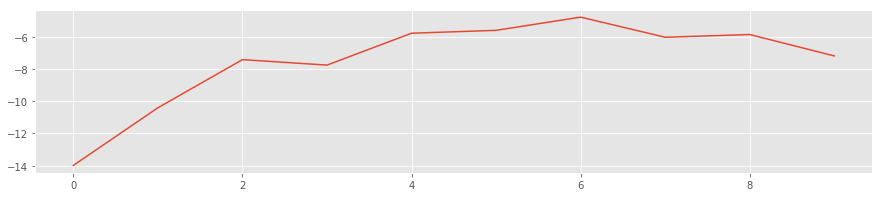

In [3]:
stds=show_performance(encoder,x_test,corp,100,printer=True)

         e 	         te
        eh 	         em
     kutya 	      kutua
     aytuk 	      aytuk
    macska 	     macska
 árvíztűrő 	  árvöztörő
      fúró 	        cró
     kacsa 	      kadsa
         a 	         ja
        és 	         és

Accuracy on data:  90.0 %


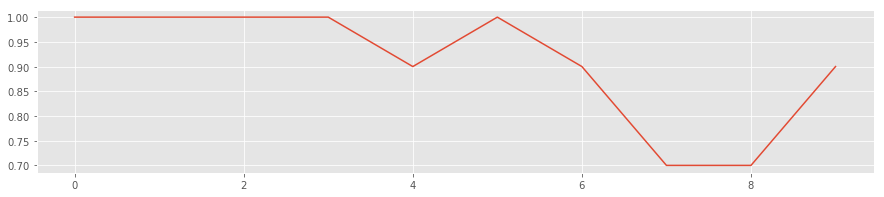

[0.48778221,
 0.78281784,
 0.75258231,
 0.61175877,
 0.57625389,
 0.46198851,
 0.41246325,
 0.36914006,
 0.6905641,
 0.46192473,
 0.56829023,
 0.29675877,
 0.49862611,
 0.44864243,
 0.53577757,
 0.67503512,
 0.69407439,
 0.48607162,
 0.50397545,
 0.64440203,
 0.99767327,
 0.89915258,
 0.89390826,
 0.52690047,
 0.55357742,
 0.83412749,
 0.77120078,
 0.45276636,
 0.50177187,
 0.60840845,
 0.68707281,
 0.65196341,
 0.44233403,
 0.38255236,
 0.56766677,
 0.69903618,
 0.50749636,
 0.53876668,
 1.249591,
 0.50824064,
 0.43349883,
 0.60144764,
 0.8374123,
 0.87289757,
 0.80172044,
 0.53037804,
 0.45015457,
 0.64599568,
 0.55614543,
 0.65609694,
 0.5728786,
 0.29894906,
 0.5302828,
 0.50031906,
 0.56289804,
 0.75259411,
 0.46797943,
 0.54292071,
 0.51198655,
 0.44871405,
 0.56206167,
 0.47766557,
 0.51292366,
 0.45355457,
 0.45555109,
 0.37008563,
 0.40795538,
 0.50682729,
 0.68293357,
 0.74657702,
 0.80404884,
 0.43905765,
 0.70632702,
 0.58432573,
 0.69370258,
 0.59504789,
 0.89789218,
 0.62

In [4]:
show_performance(encoder,["e","eh","kutya","aytuk","macska","árvíztűrő","fúró","kacsa","a","és"],corp,printer=True)

In [5]:
def decode_critical(enc=180):
    for POS in range(enc):
        encoded=np.ones(enc)
        encoded[POS]=0
        a=encoder.decode([encoded])[0].reshape([10,36])

        b=corp.defeaturize_data_charlevel_onehot([a])
        print(b)